# CS3300 Data Science
# Lab 01: Data Cleaning

## Learning Objectives
- Identify, access, load, and prepare (clean) a data set for a given problem.
- Select, apply, and interpret appropriate visual and statistical methods to analyze distributions of individual variables.
- Clean and transform data for analysis.
- Comminicate findings through generated data visualizations and reports.

## Overview
In this lab, you are going to inspect and clean a data set of real estate transactions from California. You should prepare your results as a Jupyter notebook. In addition to code and plots, you should have text offering interpretations and explanations. Your notebook should be organized into sections with appropriate headers. The notebook and its code should be clean and polished. Use the Blood Glucose Tutorial as a template and reference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part I: Loading the Data and Initial Assessment

In [2]:
data = pd.read_csv('Sacramentorealestatetransactions.csv')
data.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
data.info

<bound method DataFrame.info of                   street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type   

#### Feature analysis

The head method above gives the top specified entries of the dataframe. These entries are given in a tabular format that is nicely orgainized and allows for general invesitgation into the features on the dataframe. From this inspections we can see this dataset includes the following features.
- street
- city
- zip code
- state
- beds
- baths
- square foot
- type
- sale date
- price
- lattitude
- longitude

While this gives us an initial idea of the data that is included and from experience we can infer what types of data are used to represent this features - it may help for use to also use the dytpes attribute associated with the dataframe.

In [4]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

#### Feature analysis - dtypes
- street - String
- city - String
- zip code - Integers
- state - String
- beds - Integers
- baths - Integers
- square foot - Integers
- type - String
- sale date - __Date__
- price - Integer
- lattitude - Floats
- longitude - Floats

#### Checking for null entries

We may also want to get a feel for how well fleshed out our data entries are. We want to check for missing or null entries. The info method can give us this information, if we only ask for it.

In [5]:
data.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


## Part II: Representing Categorical Variables

In [6]:
numberOfAddresses = len(np.unique(data["street"].values))
print("Number of unique Street Addresses: " + str(numberOfAddresses))

Number of unique Street Addresses: 981


In [7]:
numberOfStates = len(np.unique(data["state"].values))
print("Number of unique States: " + str(numberOfStates))

Number of unique States: 1


In [8]:
numberOfZips = len(np.unique(data["zip"].values))
print("Number of unique Zip Codes: " + str(numberOfZips))

Number of unique Zip Codes: 68


In [9]:
numberOfBeds = len(np.unique(data["beds"].values))
print("Number of unique Beds: " + str(numberOfBeds))

Number of unique Beds: 8


In [10]:
numberOfBaths = len(np.unique(data["baths"].values))
print("Number of unique Baths: " + str(numberOfBaths))

Number of unique Baths: 6


#### Categorical versus integer variables

- Streets: This feature is presented as a string. By itself, we _could_ encode it as an integer, but it doesn't neccessarily make sense to assign an ordered meaning to streets. Does it make sense to assign Ohmaha street a value of one and Branch street a value of 2? Is one Branch street equal to 2 Ohmaha streets? Alternatively we could make them categorical variables, but in this case we would end up with 981 different categories. Having this many different categories with 985 different observations is not going to give us much power to group or discriminate in predictions.

- Zip Code: With the discission of converting streets to integer variables, the same idea applies here. While zip codes are represented by integer values, we should not intepret them as such in our models. It wouldn't neceesarily make sense to make a decision boundary based on distance between integer values of a zip code 95838 and 95815. For the purposes of our model these value differences may very well be arbitrary. So while these are represented in our dataset as integers, they would be better served in our model as categorical variables - not assigning an arbitrary integer meaning to their relationship.

- Beds: This is the most interesting feature and arguments could be made for making it either an integer or categorical variable. In this case it is on a ratio scale and represnting it as an integer is valid. However, a model may be able to capture some interesting trends if the data is represented as a categorical feature rather than an integer.

In [11]:
data_mod = data.drop(columns=["city","state","zip","beds","baths","type"])
data_mod["city"] = data["city"].astype("category")
data_mod["state"] = data["state"].astype("category")
data_mod["zip"] = data["zip"].astype("category")
data_mod["beds"] = data["beds"].astype("category")
data_mod["baths"] = data["baths"].astype("category")
data_mod["type"] = data["type"].astype("category")
data_mod.head(5)

,street,sq__ft,sale_date,price,latitude,longitude,city,state,zip,beds,baths,type
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,CA,95838,2,1,Residential
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CA,95823,3,1,Residential
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,CA,95815,2,1,Residential
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,CA,95815,2,1,Residential
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,CA,95824,2,1,Residential


In [12]:
data_mod.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   sq__ft     985 non-null    int64   
 2   sale_date  985 non-null    object  
 3   price      985 non-null    int64   
 4   latitude   985 non-null    float64 
 5   longitude  985 non-null    float64 
 6   city       985 non-null    category
 7   state      985 non-null    category
 8   zip        985 non-null    category
 9   beds       985 non-null    category
 10  baths      985 non-null    category
 11  type       985 non-null    category
dtypes: category(6), float64(2), int64(2), object(2)
memory usage: 57.5+ KB


## Part III: Cleaning Continous Variables

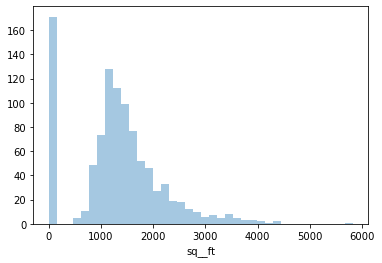

In [13]:
sns.distplot((data_mod["sq__ft"]),kde=False)

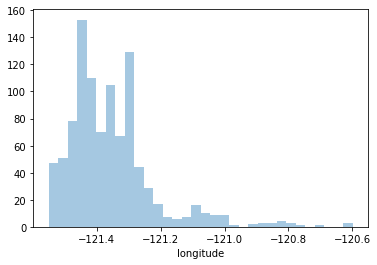

In [14]:
sns.distplot(data_mod["longitude"],kde=False)

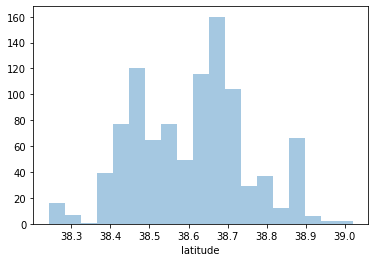

In [15]:
sns.distplot(data_mod["latitude"],kde=False)

#### Odd patterns in the plots

In the square foot plot there appear to be a lot of properties with 0 square footage. Without knowing more about the dataset it is hard to say if this is real or an artifact. We could take two approaches to this. 1) Either this is real and the properties where the square footage is zero may be lots (we could check this to see if they have beds and baths) or they could be zoned differently. 2) We could remove them as erroneous from the dataset.

## Part IV: Cleaning Categorical Variables

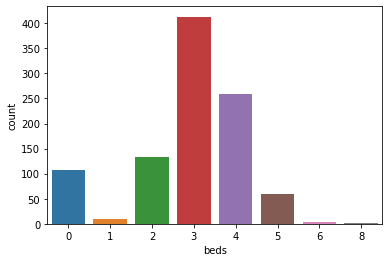

In [16]:
sns.countplot(data_mod["beds"])

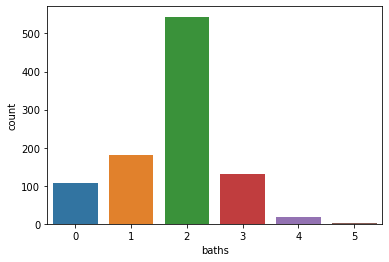

In [17]:
sns.countplot(data_mod["baths"])

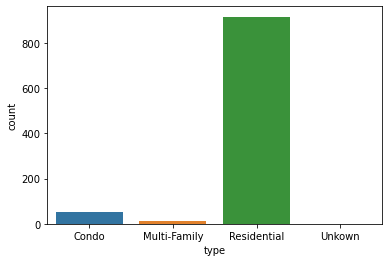

In [18]:
sns.countplot(data_mod["type"])

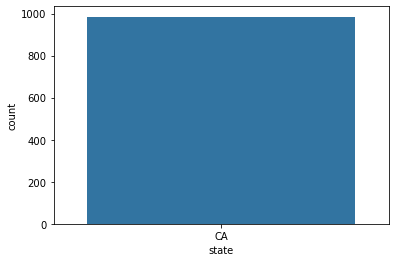

In [19]:
sns.countplot(data_mod["state"])

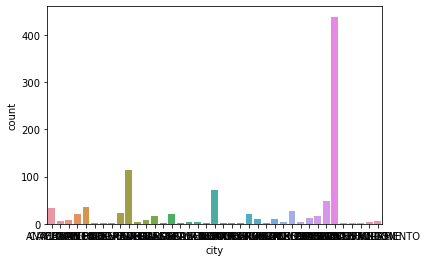

In [20]:
sns.countplot(data_mod["city"])

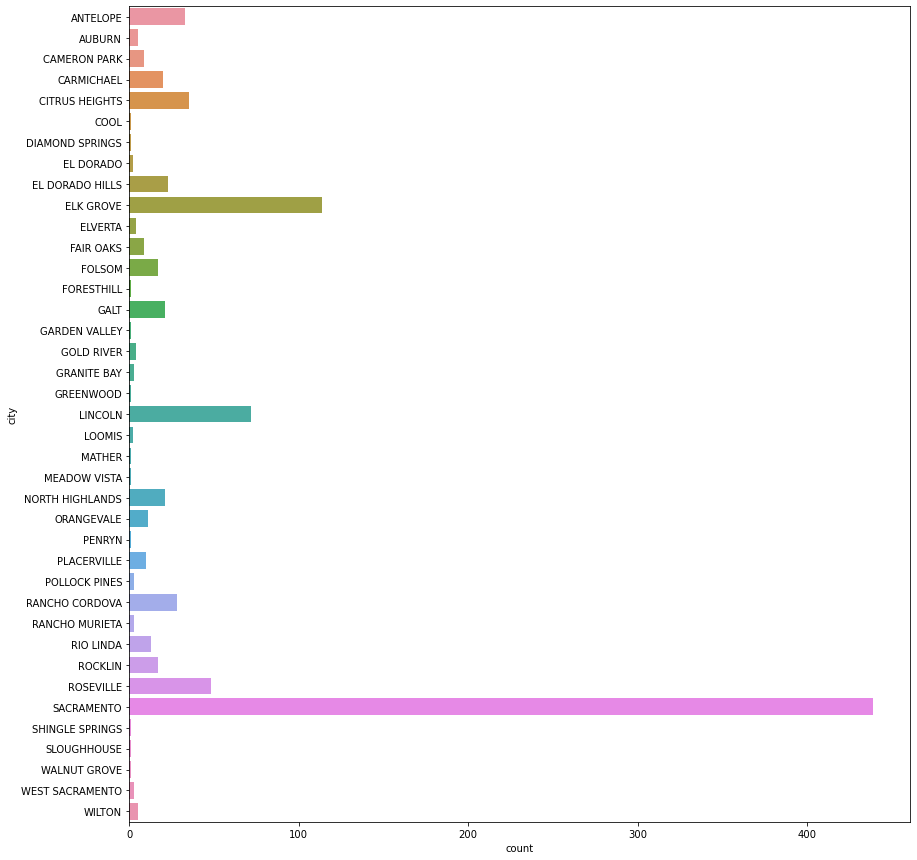

In [40]:
figure_dimensions = (14,15)
fig, ax = plt.subplots(figsize=figure_dimensions)
sns.countplot(y=data_mod["city"],ax=ax)

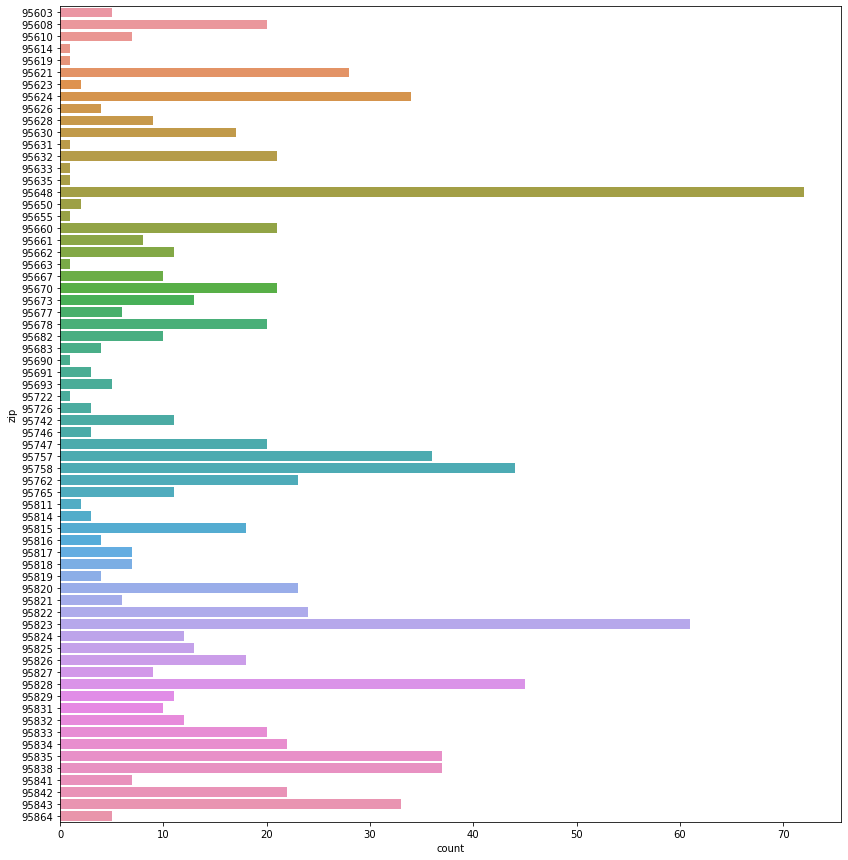

In [39]:
figure_dimensions = (14,15)
fig, ax = plt.subplots(figsize=figure_dimensions)
sns.countplot(y=data_mod["zip"],ax=ax)

#### Odd patterns in the plots

Similar to what we were seeing for the square footage, but here I think we might be more justified for thinking outside the box with beds and baths. If these are at commercial properties we might expect them to have fewer baths or beds. These could however still be errors from how the metrics are reported or entered into the system.

Of note here... How helpful are those labels on the city and zip plots?

## Part V: Engineering New Variables - Part I

In [22]:
squareFeet = data["sq__ft"]

In [23]:
emptyLot = squareFeet.map(lambda s: s==0)

In [24]:
data_mod["Empty Lot"] = emptyLot

In [25]:
data_mod.head(5)

,street,sq__ft,sale_date,price,latitude,longitude,city,state,zip,beds,baths,type,Empty Lot
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,CA,95838,2,1,Residential,False
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CA,95823,3,1,Residential,False
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,CA,95815,2,1,Residential,False
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,CA,95815,2,1,Residential,False
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,CA,95824,2,1,Residential,False


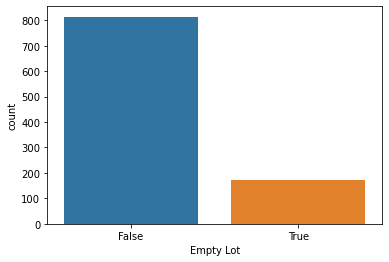

In [26]:
sns.countplot(data_mod["Empty Lot"])

## Part VI: Engineering New Variables - Part II

In [27]:
numberOfAddresses = len(np.unique(data["street"].values))
print("Number of unique Street Addresses: " + str(numberOfAddresses))

Number of unique Street Addresses: 981


#### Categorical versus integer variables

- Streets: This feature is presented as a string. By itself, we _could_ encode it as an integer, but it doesn't neccessarily make sense to assign an ordered meaning to streets. Does it make sense to assign Ohmaha street a value of one and Branch street a value of 2? Is one Branch street equal to 2 Ohmaha streets? Alternatively we could make them categorical variables, but in this case we would end up with 981 different categories. Having this many different categories with 985 different observations is not going to give us much power to group or discriminate in predictions.

In [28]:
data_mod.head(20)

,street,sq__ft,sale_date,price,latitude,longitude,city,state,zip,beds,baths,type,Empty Lot
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,CA,95838,2,1,Residential,False
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CA,95823,3,1,Residential,False
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,CA,95815,2,1,Residential,False
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,CA,95815,2,1,Residential,False
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,CA,95824,2,1,Residential,False
5,5828 PEPPERMILL CT,1122,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,SACRAMENTO,CA,95841,3,1,Condo,False
6,6048 OGDEN NASH WAY,1104,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,SACRAMENTO,CA,95842,3,2,Residential,False
7,2561 19TH AVE,1177,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,SACRAMENTO,CA,95820,3,1,Residential,False
8,11150 TRINITY RIVER DR Unit 114,941,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,RANCHO CORDOVA,CA,95670,2,2,Condo,False
9,7325 10TH ST,1146,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,RIO LINDA,CA,95673,3,2,Residential,False


In [29]:
def get_street_type(address):
    
    addressList = address.split(" ")
    
    streetType = addressList[-1]
       
    if any(map(str.isdigit, streetType)):
        streetType = addressList[-3]
        
    return streetType

In [30]:
print(get_street_type(data_mod["street"].iloc[8]))

DR


In [31]:
streetAddress = data["street"]
streets = streetAddress.map(lambda s: get_street_type(s)).astype('category')
data_mod["Street Types"] = streets
numberOfStreetTypes = len(np.unique(data_mod["Street Types"].values))
print("Number of unique Street Types: " + str(numberOfStreetTypes))

Number of unique Street Types: 24


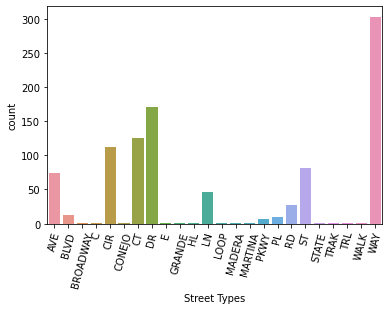

In [32]:
streetnamesplot = sns.countplot(data_mod["Street Types"])
streetnamesplot.set_xticklabels(streetnamesplot.get_xticklabels(),rotation=75);

In [33]:
def get_street_type_2(address):
    if "Unit" in address:
        idx = address.find("Unit")
        # cut off " Unit ..." from the end of the address
        address = address[:idx - 1]
    address = address.upper()
    
    if "AVENIDA" in address:
        return "AVE"
    
    if "VISTA" in address:
        return "VISTA"
    
    if "STATE HIGHWAY" in address:
        return "HWY"
    
    if "CONEJO" in address:
        return "Unknown"

    cols = address.split()
    # Assume the last entry is the street type
    return cols[-1]

In [34]:
streetAddress = data["street"]
streets = streetAddress.map(lambda s: get_street_type_2(s)).astype('category')
data_mod["Street Types"] = streets
numberOfStreetTypes = len(np.unique(data_mod["Street Types"].values))
print("Number of unique Street Types: " + str(numberOfStreetTypes))

Number of unique Street Types: 21


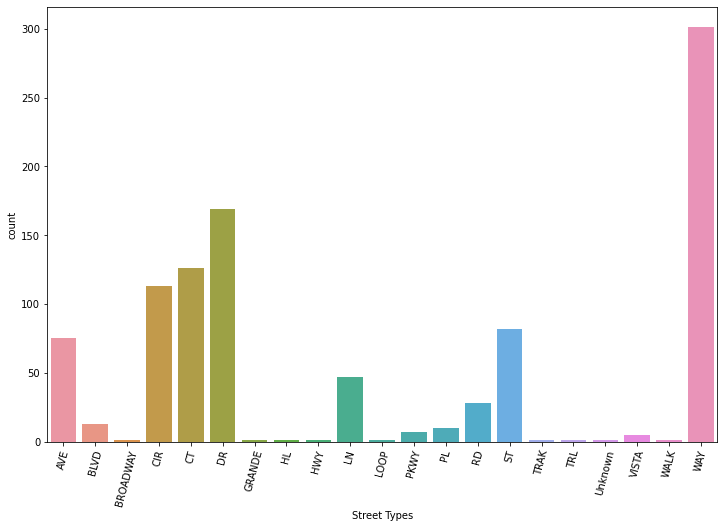

In [42]:
figure_dimensions = (12,8)
fig, ax = plt.subplots(figsize=figure_dimensions)
streetnamesplot = sns.countplot(data_mod["Street Types"],ax=ax)
streetnamesplot.set_xticklabels(streetnamesplot.get_xticklabels(),rotation=75);

## Part VII: Identifying Potential Dependent Variables

#### Regression:

Regression problems are focused on predicting continuous varibles. In the case of this dataset we have indentified a number of continous varibles including square feet, number of beds, number of baths, and price. As discussed previously the zip codes were not be good candidates for a regression problem, although we could try it to demonstrate this fact. What about longitude and lattitude?

#### Classification:

Classification problems are well suited for ordinal and nominal scale features. Where the values themselves are not neceesarily ranked although they may have some interpreatable order to them. We have identified several features in this data set that would fit well with this. Included are zip codes, street types, residential types, and city. While state is also a categorical variable, this dataset does not seem to provide enough diversity to make any interesting claims or observations about state level decisions.

In [35]:
data_mod.to_csv("Cleaned_Sacremento_Real_Estate_Date.csv",index=False)